In [ ]:

import fastf1 as ff1
import pandas as pd
from fastf1 import utils
from matplotlib import pyplot as plt
from fastf1 import plotting
from matplotlib.patches import Rectangle
import numpy as np

ff1.Cache.enable_cache('2023Miami') 
race = ff1.get_session(2023, 'Miami', 'R')
race_laps = race.load_laps(with_telemetry=True)
race.load()
stint = 2

race_laps['LapTimeSeconds'] = race_laps['LapTime'].dt.total_seconds()
race_laps = race_laps.loc[(race_laps['PitOutTime'].isnull() & race_laps['PitInTime'].isnull()) ]
#& race_laps['LapNumber'].between(11, 58, inclusive = True)
race_laps = race_laps.loc[((race_laps['Driver'] == "LEC")  & (race_laps['IsAccurate']==True)) |
                          ((race_laps['Driver'] == "PER")  & (race_laps['IsAccurate']==True)) ] 

In [ ]:
race_laps.drop(race_laps.columns.difference(['DriverNumber','LapTimeSeconds', "LapNumber"]), 1, inplace=True)


In [ ]:
driver1 = "LEC"
driver2 = "PER"
race_laps_driver1 = race_laps[race_laps['DriverNumber'].astype(int) == 16]
race_laps_driver2 = race_laps[race_laps['DriverNumber'].astype(int) == 11]
race_laps_driver1["Driver"] = driver1
race_laps_driver2["Driver"] = driver2
#Missing values?
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 17]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 17]
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 18]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 18]

race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 20]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 20]
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 21]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 21]

In [37]:
race_laps_driver1 = race_laps_driver1.loc[:,["LapNumber", "LapTimeSeconds"]]
race_laps_driver2 = race_laps_driver2.loc[:,["LapNumber", "LapTimeSeconds"]]

In [38]:
dict_time_driver1=dict(zip(race_laps_driver1.LapNumber, race_laps_driver1.LapTimeSeconds))
dict_time_driver2=dict(zip(race_laps_driver2.LapNumber, race_laps_driver2.LapTimeSeconds))


In [39]:
diff_dict = {key: (dict_time_driver2[key] - dict_time_driver1.get(key, 0)) for key in dict_time_driver2}
# Leclerc - Perez
# Se istogramma verso il basso -> Perez giro migliore di Leclerc

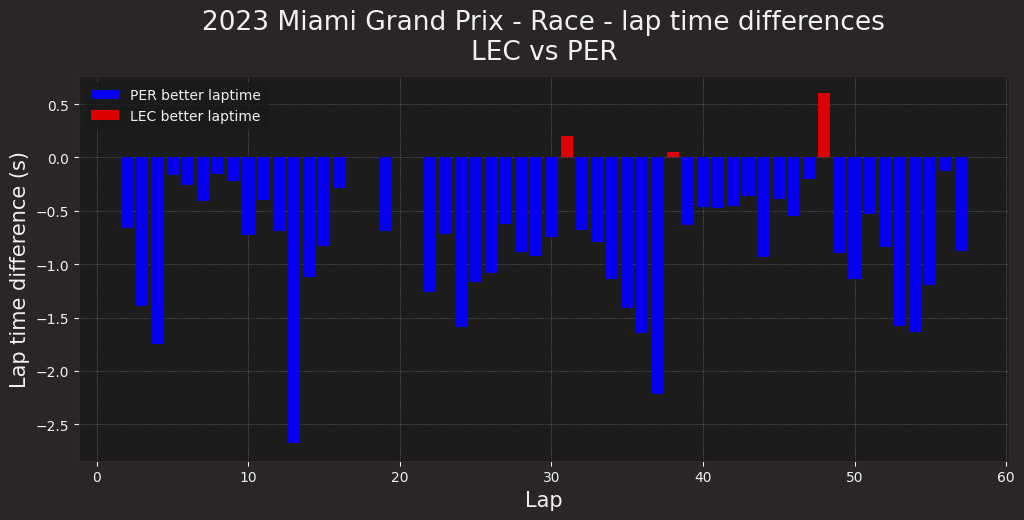

In [40]:
ff1.plotting.setup_mpl()
plt.figure(figsize=(12,5))
mask1 = dict((k, v) for k, v in diff_dict.items() if v <= 0)
mask2 = dict((k, v) for k, v in diff_dict.items() if v > 0)
plt.title(f"{race.event.year} {race.event.EventName} - {race.name} - lap time differences\n{driver1} vs {driver2}")
plt.xlabel("Lap", fontsize=15)
plt.ylabel("Lap time difference (s)", fontsize=15)
plt.grid(color="grey", linestyle=":", linewidth=0.5)
plt.bar(list(mask1.keys()), list(mask1.values()), color = ff1.plotting.team_color("Red Bull"), width=0.8, label="PER better laptime")
plt.bar(list(mask2.keys()), list(mask2.values()), color = ff1.plotting.team_color("Ferrari"), width=0.8, label = "LEC better laptime")
plt.legend()

In [ ]:

import fastf1 as ff1
import pandas as pd
from fastf1 import utils
from matplotlib import pyplot as plt
from fastf1 import plotting
from matplotlib.patches import Rectangle
import numpy as np

ff1.Cache.enable_cache('2023Miami') 
race = ff1.get_session(2023, 'Miami', 'R')
race_laps = race.load_laps(with_telemetry=True)
race.load()
stint = 2

race_laps['LapTimeSeconds'] = race_laps['LapTime'].dt.total_seconds()
race_laps = race_laps.loc[(race_laps['PitOutTime'].isnull() & race_laps['PitInTime'].isnull()) ]
#& race_laps['LapNumber'].between(11, 58, inclusive = True)
race_laps = race_laps.loc[((race_laps['Driver'] == "LEC")  & (race_laps['IsAccurate']==True)) |
                          ((race_laps['Driver'] == "VER")  & (race_laps['IsAccurate']==True)) ] 

In [ ]:
race_laps.drop(race_laps.columns.difference(['DriverNumber','LapTimeSeconds', "LapNumber"]), 1, inplace=True)
driver1 = "LEC"
driver2 = "VER"
race_laps_driver1 = race_laps[race_laps['DriverNumber'].astype(int) == 16]
race_laps_driver2 = race_laps[race_laps['DriverNumber'].astype(int) == 1]
race_laps_driver1["Driver"] = driver1
race_laps_driver2["Driver"] = driver2
#Missing values?
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 17]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 17]
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 18]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 18]

race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 45]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 45]
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 46]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 46]

In [43]:
race_laps_driver1 = race_laps_driver1.loc[:,["LapNumber", "LapTimeSeconds"]]
race_laps_driver2 = race_laps_driver2.loc[:,["LapNumber", "LapTimeSeconds"]]

In [44]:
dict_time_driver1=dict(zip(race_laps_driver1.LapNumber, race_laps_driver1.LapTimeSeconds))
dict_time_driver2=dict(zip(race_laps_driver2.LapNumber, race_laps_driver2.LapTimeSeconds))


In [45]:
diff_dict = {key: (dict_time_driver2[key] - dict_time_driver1.get(key, 0)) for key in dict_time_driver2}
# Leclerc - Verstappen
# Se istogramma verso il basso -> Verstappen giro migliore di Leclerc

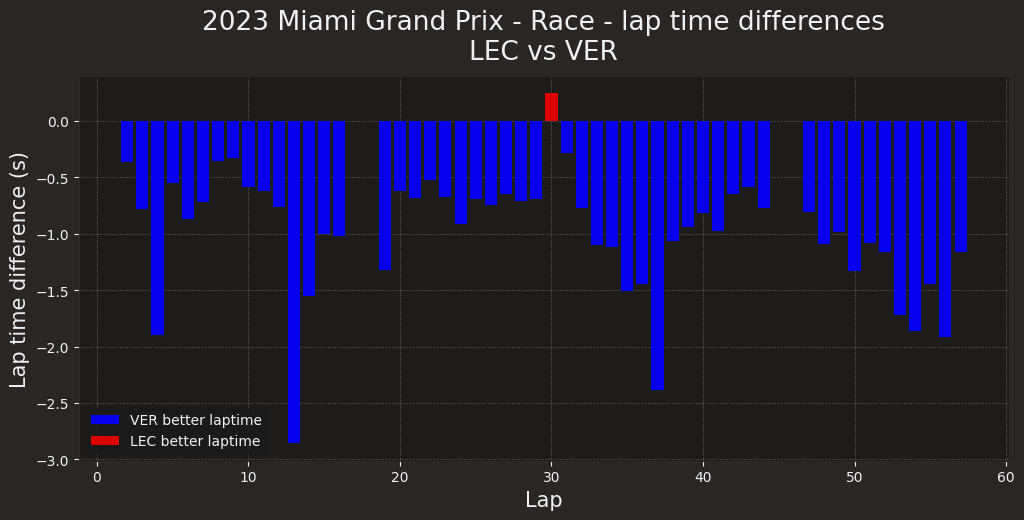

In [46]:
ff1.plotting.setup_mpl()
plt.figure(figsize=(12,5))
mask1 = dict((k, v) for k, v in diff_dict.items() if v <= 0)
mask2 = dict((k, v) for k, v in diff_dict.items() if v > 0)
plt.title(f"{race.event.year} {race.event.EventName} - {race.name} - lap time differences\n{driver1} vs {driver2}")
plt.xlabel("Lap", fontsize=15)
plt.ylabel("Lap time difference (s)", fontsize=15)
plt.grid(color="grey", linestyle=":", linewidth=0.5)
plt.bar(list(mask1.keys()), list(mask1.values()), color = ff1.plotting.team_color("Red Bull"), width=0.8, label = "VER better laptime")
plt.bar(list(mask2.keys()), list(mask2.values()), color = ff1.plotting.team_color("Ferrari"), width=0.8, label = "LEC better laptime")
plt.legend()

In [47]:

import fastf1 as ff1
import pandas as pd
from fastf1 import utils
from matplotlib import pyplot as plt
from fastf1 import plotting
from matplotlib.patches import Rectangle
import numpy as np

ff1.Cache.enable_cache('2023Miami') 
race = ff1.get_session(2023, 'Miami', 'R')
race_laps = race.load_laps(with_telemetry=True)
race.load()
stint = 2

race_laps['LapTimeSeconds'] = race_laps['LapTime'].dt.total_seconds()
race_laps = race_laps.loc[(race_laps['PitOutTime'].isnull() & race_laps['PitInTime'].isnull())]
#& race_laps['LapNumber'].between(11, 58, inclusive = True)
race_laps = race_laps.loc[((race_laps['Driver'] == "LEC")) |
                          ((race_laps['Driver'] == "ALO")) ] 

api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '63', '55', '44', '16', '10', '31', '20', '22', '18', '77', '23', '27', '24', '4', '21', '81', '2']


In [ ]:
race_laps.drop(race_laps.columns.difference(['DriverNumber','LapTimeSeconds', "LapNumber"]), 1, inplace=True)
driver1 = "LEC"
driver2 = "ALO"
race_laps_driver1 = race_laps[race_laps['DriverNumber'].astype(int) == 16]
race_laps_driver2 = race_laps[race_laps['DriverNumber'].astype(int) == 14]
race_laps_driver1["Driver"] = driver1
race_laps_driver2["Driver"] = driver2
# sto eliminando i giri in cui i pilori hanno fatto il pit stop -> ma non tutti hanno fatto il ppit stop allo stesso momento,
# quindi devo eliminare i giri di entrambi i piloti nel momento in cui uno dei due ha fatto il pit stop il pit stop (se LEC 
# ha fatto il pit stop ai giri 18 e 19 devo eliminare i giri 18 e 19 anche di alonso)
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 17]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 17]
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 18]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 18]

race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 24]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 24]
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 25]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 25]

In [49]:
race_laps_driver1 = race_laps_driver1.loc[:,["LapNumber", "LapTimeSeconds"]]
race_laps_driver2 = race_laps_driver2.loc[:,["LapNumber", "LapTimeSeconds"]]

In [50]:
dict_time_driver1=dict(zip(race_laps_driver1.LapNumber, race_laps_driver1.LapTimeSeconds))
dict_time_driver2=dict(zip(race_laps_driver2.LapNumber, race_laps_driver2.LapTimeSeconds))


In [51]:
diff_dict = {key: (dict_time_driver2[key] - dict_time_driver1.get(key, 0)) for key in dict_time_driver2}
# Leclerc - Alonso
# Se istogramma verso il basso -> Alonso giro migliore di Leclerc

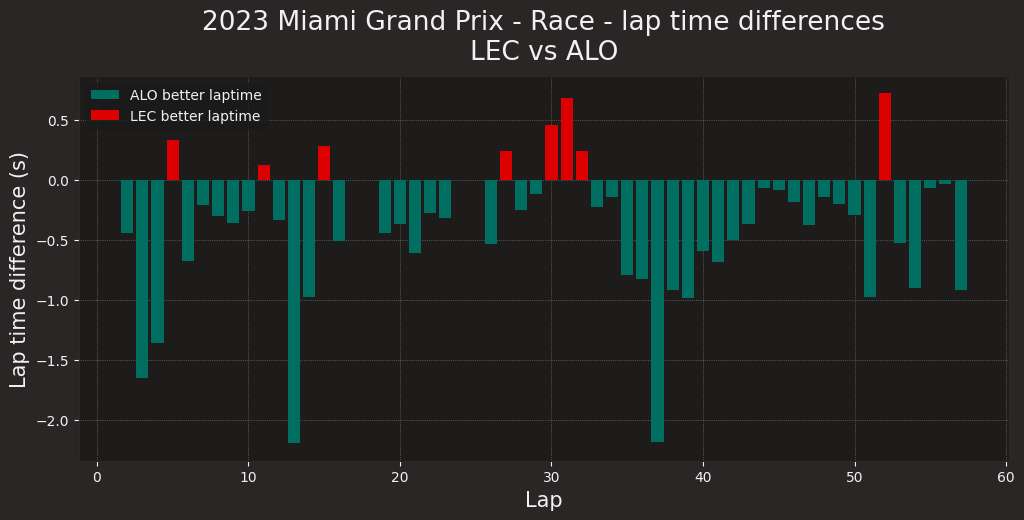

In [52]:
ff1.plotting.setup_mpl()
plt.figure(figsize=(12,5))
mask1 = dict((k, v) for k, v in diff_dict.items() if v <= 0)
mask2 = dict((k, v) for k, v in diff_dict.items() if v > 0)
plt.title(f"{race.event.year} {race.event.EventName} - {race.name} - lap time differences\n{driver1} vs {driver2}")
plt.xlabel("Lap", fontsize=15)
plt.ylabel("Lap time difference (s)", fontsize=15)
plt.grid(color="grey", linestyle=":", linewidth=0.5)
plt.bar(list(mask1.keys()), list(mask1.values()), color = ff1.plotting.team_color("Aston Martin"), width=0.8, label = "ALO better laptime")
plt.bar(list(mask2.keys()), list(mask2.values()), color = ff1.plotting.team_color("Ferrari"), width=0.8, label = "LEC better laptime")
plt.legend()